## House Price Prediction

#### Life Cycle of Machine Learning Project
- Understanding the Problem Statement
- Data Collection
- Data Check to Perform
- Exploratory data analysis 
- Data Pre-Processing 
- Model Training 
- Choose best Model 

### 1) Problem Statement 
- This project understands how the house price affected by various variables like Area, Subclass, Land measurement, House structure style, Bedroom, Year of built and many other factors, playing a deciding roll for price prediction 

### 2) Data Collection 
- Data source - https://www.kaggle.com/datasets/prevek18/ames-housing-dataset
- The data contain 82 columns and 2930 raws.

#### 2.1 import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library 

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 


Import the CSV Data as Panda DataFrame 

In [2]:
data = pd.read_csv('AmesHousing.csv')

Show the top 5 record 

In [3]:
data.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Shape of dataset

In [4]:
data.shape

(2930, 82)

In [13]:
data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

#### 2.2 Data Observation
As primary data observation of above data We can dived in 17 group that lead to target variable 

- Property Information
- Lot Information
- Build type and Style
- Quality and Condition
- Construction Details 
- Exterior and Foundation 
- Basement Details
- Heating and Cooling 
- Electrical & Interior
- Bathrooms
- Rooms
- House Functionality 
- Fireplace
- Garage 
- Outdoor Features
- Pools and Miscellaneous 
- Sale Information 


### 3. Data Check to Perform 
- Check Missing value 
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistic of data Set 
- Check various categories present in the different categorical column


#### 3.1 Check Missing Value

In [30]:
missing_data = data.isna().sum().reset_index()
missing_data.columns = ['column', 'missing values']
missing_data = missing_data[missing_data['missing values'] != 0]
print(missing_data)

            column  missing values
4     Lot Frontage             490
7            Alley            2732
26    Mas Vnr Type            1775
27    Mas Vnr Area              23
31       Bsmt Qual              80
32       Bsmt Cond              80
33   Bsmt Exposure              83
34  BsmtFin Type 1              80
35    BsmtFin SF 1               1
36  BsmtFin Type 2              81
37    BsmtFin SF 2               1
38     Bsmt Unf SF               1
39   Total Bsmt SF               1
43      Electrical               1
48  Bsmt Full Bath               2
49  Bsmt Half Bath               2
58    Fireplace Qu            1422
59     Garage Type             157
60   Garage Yr Blt             159
61   Garage Finish             159
62     Garage Cars               1
63     Garage Area               1
64     Garage Qual             159
65     Garage Cond             159
73         Pool QC            2917
74           Fence            2358
75    Misc Feature            2824


Dataset has contain total 84 columns as a variable out of 27 columns as missing values, top missing value variable like **'-PoolQC', 'Alley', 'Misc Feature' and 'Fence'**

#### 3.2 Check Duplicate 

In [31]:
data.duplicated().sum()

0

Dataset have no duplicate values

#### 3.3 Check Data Type 

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

#### 3.4 Checking the number of unique values of each column 

In [35]:
unique = data.nunique().reset_index()
#unique.columns = ['columns', 'unique']
print(unique.values)

[['Order' 2930]
 ['PID' 2930]
 ['MS SubClass' 16]
 ['MS Zoning' 7]
 ['Lot Frontage' 128]
 ['Lot Area' 1960]
 ['Street' 2]
 ['Alley' 2]
 ['Lot Shape' 4]
 ['Land Contour' 4]
 ['Utilities' 3]
 ['Lot Config' 5]
 ['Land Slope' 3]
 ['Neighborhood' 28]
 ['Condition 1' 9]
 ['Condition 2' 8]
 ['Bldg Type' 5]
 ['House Style' 8]
 ['Overall Qual' 10]
 ['Overall Cond' 9]
 ['Year Built' 118]
 ['Year Remod/Add' 61]
 ['Roof Style' 6]
 ['Roof Matl' 8]
 ['Exterior 1st' 16]
 ['Exterior 2nd' 17]
 ['Mas Vnr Type' 4]
 ['Mas Vnr Area' 445]
 ['Exter Qual' 4]
 ['Exter Cond' 5]
 ['Foundation' 6]
 ['Bsmt Qual' 5]
 ['Bsmt Cond' 5]
 ['Bsmt Exposure' 4]
 ['BsmtFin Type 1' 6]
 ['BsmtFin SF 1' 995]
 ['BsmtFin Type 2' 6]
 ['BsmtFin SF 2' 274]
 ['Bsmt Unf SF' 1137]
 ['Total Bsmt SF' 1058]
 ['Heating' 6]
 ['Heating QC' 5]
 ['Central Air' 2]
 ['Electrical' 5]
 ['1st Flr SF' 1083]
 ['2nd Flr SF' 635]
 ['Low Qual Fin SF' 36]
 ['Gr Liv Area' 1292]
 ['Bsmt Full Bath' 4]
 ['Bsmt Half Bath' 3]
 ['Full Bath' 5]
 ['Half Bath' 3]

#### 3.5 Check Statistics of data set 

In [38]:
stat = data.describe()
print(stat)

            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361       20.860286    

#### Insight
- Dataset have 39 columns with numerical values 
- The target variable `SalePrice` has mean **$1,80,796.06** with std of **$79,886**, indicating a significant spread in house price
- `Overall Qual` (Quality of House) range from **1 to 10** with Mean **6.09**, showing a relatively high quality of average.
- `Lot Area` has wid range with some extrema outlier (Max Property Size **215,245**), which indict largest property.
- `Year Built` has range **1872 to 2010**, Here around **25%** value falls under **75 to 100** percentile rank with year range of **2001 to 2010** show selling new house is more popular.
  

#### 3.6 Exploratory Data   

In [48]:
## Define numerical columns and Categorical columns 
numerical_features = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]
categorical_features = [col for col in data.columns if data[col].dtype in ['object']]

print('we have {} numerical features {}:'.format(len(numerical_features), numerical_features))
print('\nwe have {} numerical features {}:'.format(len(categorical_features), categorical_features))

we have 39 numerical features ['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']:

we have 43 numerical features ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'B

In [53]:
# Group by 'OverallQual' and calculate the count and mean of 'SalePrice'
quality_stats = data.groupby('Overall Qual').agg(
    count=('Overall Qual', 'size'),  # Count the number of occurrences of each quality level
    average_sale_price=('SalePrice', 'mean')  # Calculate the average 'SalePrice' for each quality level
)

# Display the result
print(quality_stats)


              count  average_sale_price
Overall Qual                           
1                 4        48725.000000
2                13        52325.307692
3                40        83185.975000
4               226       106485.097345
5               825       134752.516364
6               732       162130.318306
7               602       205025.760797
8               350       270913.594286
9               107       368336.766355
10               31       450217.322581


- From above we have 39 numerical and 43 categorical variable in this dataset
- `Overall Quality` **10** number quality house **31** and Lowest quality **1** number house count is only **4**

### 4. Exploratory Data (Visualization)

#### 4.1 Univariate Analysis 

Text(0.5, 1.0, 'House Area Distribution')

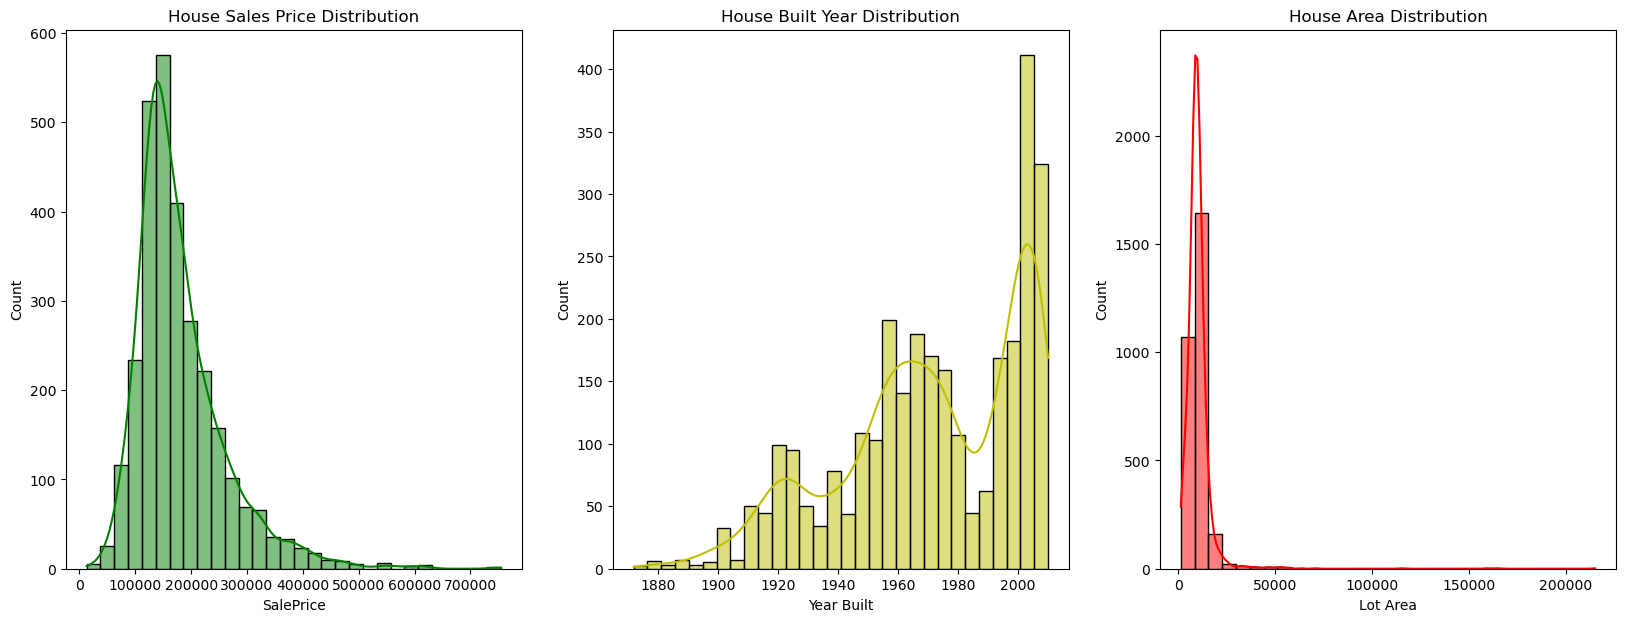

In [68]:
## Distribution of sales price, lot area, built year
fig, ax = plt.subplots(1, 3, figsize = (20,7))
plt.subplot(131)
sns.histplot(data, x = data['SalePrice'], bins=30, kde=True, color='g' )
plt.title('House Sales Price Distribution')
plt.subplot(132)
sns.histplot(data, x = data['Year Built'], kde = True, bins=30, color='y')
plt.title('House Built Year Distribution')
plt.subplot(133)
sns.histplot(data, x =  data['Lot Area'], kde = True, bins=30, color='r' )
plt.title('House Area Distribution')